In [1]:
# -*- coding: utf-8 -*-
from types import SimpleNamespace as Namespace
import pandas as pd
import glob
import numpy as np
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib
import matplotlib.style
matplotlib.style.use('ggplot')
import seaborn
import operator
import math
import seaborn as sns
import re
import json

In [2]:
# —Å–æ–∑–¥–∞–µ–º –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–∞
def AddLabel(data, count, n, df):
    # –ø—Ä–∏—Å–≤–∞–µ–º –º–µ—Ç–∫—É
    cnt = count
    tmp = 0
    for i in range(0, len(data)):
        tmp = tmp + 1
        try:
            val = cnt + tmp
            df.loc[-1] = [data[i]['theme'], val]
            df.index = df.index + 1
            data[i].update({"label": val})
            AddLabel(data[i]['questions'], (val) * n, n * 10, df)
        except:
            val = cnt + tmp
            data[i].update({"label": val})
    return

In [232]:
# –≤—ã—Ç–∞—Å–∫–∏–≤–∞–µ–º –º–µ—Ç–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
# –° –í–û–ü–†–û–°–û–ú –ò –û–¢–í–ï–¢–û–ú
def Unroll(data, labels, temp, n, m):
    for i in range(0, len(data)):
        try:
            while len(str(data[i]['label'])) <= len(str(temp[-1])):
                temp = temp[:-1]
            temp.append(data[i]['label'])
        except:
            temp.append(data[i]['label'])
        try:
            Unroll1(data[i]['questions'], labels, temp, n, m)
            temp = temp[:-2]
        except:
            temp.append(data[i]['question'])
            temp.append(data[i]['response'])
            labels.append(temp)
            temp = temp[:-2]

In [213]:
labels1 = 1000 * []
Unroll1(data1, labels1, [] * 6, 0, 0)

In [239]:
#—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ dataframe
def Create_Df(data, max_depth, df_chavo):
    cnt = 0
    for line in data:
        tmp_cnt = 0
        tmp = [] * 5
        for obj in line:
            #print(obj)
            if isinstance(obj, int) and tmp_cnt <= max_depth:
                tmp.append(obj)
                tmp_cnt = tmp_cnt + 1
            elif isinstance(obj, int) is False and tmp_cnt <= max_depth:
                while tmp_cnt <= max_depth - 1:
                    tmp.append('None')
                    tmp_cnt = tmp_cnt + 1
                tmp.append(obj)
        df_chavo.loc[-1] = tmp
        df_chavo.index = df_chavo.index + 1
        cnt = cnt + 1
    return

In [228]:
df_chavo1 = pd.DataFrame(columns=['theme0', 'theme1', 'theme2', 'theme3', 'theme4', 'question', 'response'])
Create_Df(labels1, max_depth + 1, df_chavo1)

[101, 1011, 101101, 101101001, 'None', '–¢–ê–†–ò–§ –í SIEBEL –ù–ï –ü–û–î–ö–õ–Æ–ß–ï–ù - –ü–†–û–í–ï–†–ò–¢–¨ –î–ê–¢–£ –£–°–¢–ê–ù–û–í–ö–ò –ú–ü –í SIEBEL, –ï–°–õ–ò –ü–†–û–®–õ–û –ú–ï–ù–ï–ï –î–í–£–• –î–ù–ï–ô', '–ü–æ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–º –ø—Ä–∏—á–∏–Ω–∞–º, –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ —Ç–∞—Ä–∏—Ñ–æ–≤ —Å—Ç–∞–Ω–µ—Ç –¥–æ—Å—Ç—É–ø–Ω–æ –Ω–∞ –í–∞—à–µ–π –±–æ–Ω—É—Å–Ω–æ–π –∫–∞—Ä—Ç–µ –ù–ê–ó–í–ê–¢–¨ –î–ê–¢–£ –ß–ï–†–ï–ó –î–í–ê –î–ù–Ø –ü–û–°–õ–ï –£–°–¢–ê–ù–û–í–ö–ò –ú–ü. –ü—Ä–∏–Ω–æ—Å–∏–º –∏–∑–≤–∏–Ω–µ–Ω–∏—è –∑–∞ –¥–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–µ –Ω–µ—É–¥–æ–±—Å—Ç–≤–∞. –°–¢–ê–¢–ò–°–¢–ò–ö–ê']
[101, 1011, 101101, 101101002, 'None', '–ü–†–û–®–õ–û –î–í–ê –î–ù–Ø –° –î–ê–¢–´ –£–°–¢–ê–ù–û–í–ö–ò –ú–ü –í SIEBEL, –¢–ê–†–ò–§–´ –ù–ï –û–¢–û–ë–†–ê–ó–ò–õ–ò–°–¨', '–ü—Ä–æ—Å–∏–º –í–∞—Å –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å —Å–¥–µ–ª–∞—Ç—å Pull To Refresh (–ø–æ—Ç—è–Ω—É—Ç—å —ç–∫—Ä–∞–Ω –≤–Ω–∏–∑, –Ω–∞—Ö–æ']
[101, 1011, 101102, 'None', 'None', '–ö–ê–ö –í–û–ô–¢–ò (–ê–í–¢–û–†–ò–ó–û–í–ê–¢–¨–°–Ø) –í –ú–ü?', 'iOS –î–ª—è –≤—Ö–æ–¥–∞ –≤ –º–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω

[101, 1014, 101410, 'None', 'None', '–¢–†–ê–ù–°–ü–û–ù–î–ï–†', '–ù–∞ —ç—Ç–æ–π —Å—Ç—Ä–∞–Ω–∏—Ü–µ –í—ã –º–æ–∂–µ—Ç–µ –ø–æ–ø–æ–ª–Ω–∏—Ç—å –±–∞–ª–∞–Ω—Å –Ω–∞ —Å—á–µ—Ç—É —Ç—Ä–∞–Ω—Å–ø–æ–Ω–¥–µ—Ä–∞ –ê–≤—Ç–æ–¥–æ—Ä –±–µ–∑ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏. –î–ª—è —ç—Ç–æ–≥–æ –≤ —Å–∏—Å—Ç–µ–º–µ –í–∞–º –Ω—É–∂–Ω–æ –≤—ã–±—Ä–∞—Ç—å —Å–ø–æ—Å–æ–± –æ–ø–ª–∞—Ç—ã (–ø–æ –Ω–æ–º–µ—Ä—É –º–æ–±–∏–ª—å–Ω–æ–≥–æ —Ç–µ–ª–µ—Ñ–æ–Ω–∞, –ø–æ –Ω–æ–º–µ—Ä—É –¥–æ–≥–æ–≤–æ—Ä–∞, –ø–æ –Ω–æ–º–µ—Ä—É —Ç—Ä–∞–Ω—Å–ø–æ–Ω–¥–µ—Ä–∞), –≤–Ω–µ—Å—Ç–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ –¥–ª—è –æ–ø–ª–∞—Ç—ã. –£—Å–ª—É–≥–∞ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –∫–æ–º–ø–∞–Ω–∏–µ–π –ê–≤—Ç–æ–¥–æ—Ä-–ü–ª–∞—Ç–Ω—ã–µ –¥–æ—Ä–æ–≥–∏. –ü–æ –ª—é–±—ã–º –≤–æ–ø—Ä–æ—Å–∞–º –æ –¥–∞–Ω–Ω–æ–π —É—Å–ª—É–≥–µ –í—ã –º–æ–∂–µ—Ç–µ –æ–±—Ä–∞—Ç–∏—Ç—å—Å—è –ø–æ —Ç–µ–ª–µ—Ñ–æ–Ω—É –≥–æ—Ä—è—á–µ–π –ª–∏–Ω–∏–∏ 8-800-707-23-23.']
[101, 1014, 101411, 'None', 'None', '–ö–û–ù–°–£–õ–¨–¢–ê–¶–ò–ò', '–ù–∞ —ç—Ç–æ–π —Å—Ç—Ä–∞–Ω–∏—Ü–µ –í—ã –º–æ–∂–µ—Ç–µ –∑–∞–∫–∞–∑–∞—Ç—å –±–µ—Å–ø–ª–∞—Ç–Ω—É—é –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—é –ø—Ä–

[105, 1051, 105102, 'None', 'None', '–ö–ê–ö –ó–ê–ü–†–ê–í–õ–Ø–¢–¨–°–Ø –° –ü–û–ú–û–©–¨–Æ –ú–û–ë–ò–õ–¨–ù–û–ì–û –ü–†–ò–õ–û–ñ–ï–ù–ò–Ø –ê–ó–° GO?', '–ú–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ —Ä–∞–±–æ—Ç–∞–µ—Ç –ø–æ —Å–∏—Å—Ç–µ–º–µ ¬´–ø—Ä–µ–¥–æ–ø–ª–∞—Ç–∞¬ª. –ß—Ç–æ–±—ã –∑–∞–ø—Ä–∞–≤–∏—Ç—å—Å—è —Å –ø–æ–º–æ—â—å—é –º–æ–±–∏–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –ê–ó–° G–û: 1.\t–û—Å—Ç–∞–Ω–æ–≤–∏—Ç–µ—Å—å —É —Å–≤–æ–±–æ–¥–Ω–æ–π —Ç–æ–ø–ª–∏–≤–Ω–æ-—Ä–∞–∑–¥–∞—Ç–æ—á–Ω–æ–π –∫–æ–ª–æ–Ω–∫–∏ 2.\t–í –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ –≤—ã–±–µ—Ä–∏—Ç–µ –ê–ó–°, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–π –Ω–∞—Ö–æ–¥–∏—Ç–µ—Å—å. 3.\t–£–∫–∞–∂–∏—Ç–µ –Ω–æ–º–µ—Ä –∫–æ–ª–æ–Ω–∫–∏, –Ω–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ç–æ–ø–ª–∏–≤–∞ –∏ –æ–±—ä–µ–º 4.\t–£–∫–∞–∂–∏—Ç–µ —ç–ª. –ø–æ—á—Ç—É –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è —á–µ–∫–∞ –æ–± –æ–ø–ª–∞—Ç–µ 5.\t–û–ø–ª–∞—Ç–∏—Ç–µ –∑–∞–∫–∞–∑ 6.\t–î–æ–∂–¥–∏—Ç–µ—Å—å –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∑–∞–∫–∞–∑–∞ 7.\t–ù–µ —Å–Ω–∏–º–∞–π—Ç–µ –ø–∏—Å—Ç–æ–ª–µ—Ç –¥–æ —É–∫–∞–∑–∞–Ω–∏—è –ø–æ–º–æ—â–Ω–∏–∫–∞ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ 8.\t–ü–æ—Å–ª–µ –æ–¥–æ–±—Ä–µ–Ω–∏—è –ø–æ–º–æ

[105, 1052, 105222, 'None', 'None', '–ö–ê–ö –£–ó–ù–ê–¢–¨ –°–ö–û–õ–¨–ö–û –§–ê–ö–¢–ò–ß–ï–°–ö–ò –°–ü–ò–°–ê–ù–û –° –ö–ê–†–¢–´?', '–ò–∑-–∑–∞ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–µ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ –æ–ø–µ—Ä–∞—Ü–∏–π –ø–æ –±–∞–Ω–∫–æ–≤—Å–∫–∏–º –∫–∞—Ä—Ç–∞–º –ø—Ä–∏ ¬´—Ä–∞–∑–º–æ—Ä–æ–∑–∫–µ¬ª –¥–µ–Ω–µ–∂–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤ –∫–ª–∏–µ–Ω—Ç –Ω–µ –ø–æ–ª—É—á–∞–µ—Ç —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ –æ–± –æ–ø–µ—Ä–∞—Ü–∏–∏ –Ω–∞ —Å–≤–æ–π —Ç–µ–ª–µ—Ñ–æ–Ω.  –°—É–º–º—É —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏ —Å–ø–∏—Å–∞–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤ –º–æ–∂–Ω–æ —É–≤–∏–¥–µ—Ç—å –≤ —Ä–µ–µ—Å—Ç—Ä–µ –ø–æ –æ–ø–µ—Ä–∞—Ü–∏—è–º –ø–æ –∫–∞—Ä—Ç–µ —á–µ—Ä–µ–∑ 1-3 –¥–Ω—è –ø–æ—Å–ª–µ –∑–∞–ø—Ä–∞–≤–∫–∏. –†–µ–µ—Å—Ç—Ä –æ–ø–µ—Ä–∞—Ü–∏–π –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –≤ –±–∞–Ω–∫–µ, –≤—ã–ø—É—Å—Ç–∏–≤—à–µ–º –∫–∞—Ä—Ç—É, –ª–∏–±–æ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–º —Ä–∞–∑–¥–µ–ª–µ –º–æ–±–∏–ª—å–Ω–æ–≥–æ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –±–∞–Ω–∫–∞.  –°—É–º–º–∞ –≤ —Ä–µ–µ—Å—Ç—Ä–µ –æ–ø–µ—Ä–∞—Ü–∏–π –±—É–¥–µ—Ç –≤ —Ç–æ—á–Ω–æ—Å—Ç–∏ —Å–æ–≤–ø–∞–¥–∞—Ç—å —Å —Å—É–º–º–æ–π –≤ –∫–∞—Å—Å–æ–≤–æ–º —á–µ–∫–µ, –∫–æ—Ç–æ—Ä—ã–π –∫–ª–∏–µ–Ω

[106, 1082, 'None', 'None', 'None', '–û–ë–Ø–ó–ê–¢–ï–õ–¨–ù–û –õ–ò –ë–´–¢–¨ –£–ß–ê–°–¢–ù–ò–ö–û–ú –ü–†–û–ì–†–ê–ú–ú–´ –õ–û–Ø–õ–¨–ù–û–°–¢–ò ¬´–ù–ê–ú –ü–û –ü–£–¢–ò¬ª /–ó–ê–ü–†–ê–í–õ–Ø–¢–¨–°–Ø –° –ü–†–ò–ú–ï–ù–ï–ù–ò–ï–ú –ö–ê–†–¢–´? ', '–î–∞. –î–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –ø—Ä–∏–∑–æ–≤–æ–≥–æ –Ω–∞—á–∏—Å–ª–µ–Ω–∏—è –¥–≤–æ–π–Ω—ã—Ö –±–æ–Ω—É—Å–æ–≤ –∑–∞ –ø–æ–∫—É–ø–∫–∏ —Ç–æ–ø–ª–∏–≤–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∏–º–µ—Ç—å –∫–∞—Ä—Ç—É –ø—Ä–æ–≥—Ä–∞–º–º—ã –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏ ¬´–ù–∞–º –ø–æ –ø—É—Ç–∏¬ª.']
[106, 1083, 'None', 'None', 'None', '–†–ê–°–ü–†–û–°–¢–†–ê–ù–Ø–ï–¢–°–Ø –õ–ò –ü–†–ï–î–õ–û–ñ–ï–ù–ò–ï –ù–ê –°–¢–∏–£, –î–û–ü. –£–°–õ–£–ì–ò –ò –°–ï–†–í–ò–°–´?', '–ù–µ—Ç. –î–≤–æ–π–Ω—ã–µ –±–æ–Ω—É—Å—ã –±—É–¥—É—Ç –Ω–∞—á–∏—Å–ª—è—Ç—å—Å—è —Ç–æ–ª—å–∫–æ –Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—å–Ω–æ–µ —Ç–æ–ø–ª–∏–≤–æ.']
[106, 1084, 'None', 'None', 'None', '–Ø –ú–û–ì–£ –£–ß–ê–°–¢–í–û–í–ê–¢–¨ –í –î–†–£–ì–ò–• –ê–ö–¶–ò–Ø–• –û–î–ù–û–í–†–ï–ú–ï–ù–ù–û –° –≠–¢–û–ô? ', '–ù–∞—á–∏—Å–ª–µ–Ω–∏–µ –±–æ–Ω—É—Å–æ–≤ –ø–æ –Ω–∞—Å—Ç–æ—è—â–µ–π –ê–∫—Ü–∏–∏ —Å—É–º–º–∏—Ä—É–µ—Ç—Å—

In [229]:
df_chavo1

theme0 theme1  theme2     theme3 theme4  \
243    101   1011  101101  101101001   None   
242    101   1011  101101  101101002   None   
241    101   1011  101102       None   None   
240    101   1011  101103       None   None   
239    101   1011  101104       None   None   
..     ...    ...     ...        ...    ...   
4      110   1102    None       None   None   
3      111   1111    None       None   None   
2      111   1112    None       None   None   
1      112   1121    None       None   None   
0      112   1122    None       None   None   

                                              question  \
243  –¢–ê–†–ò–§ –í SIEBEL –ù–ï –ü–û–î–ö–õ–Æ–ß–ï–ù - –ü–†–û–í–ï–†–ò–¢–¨ –î–ê–¢–£ –£...   
242  –ü–†–û–®–õ–û –î–í–ê –î–ù–Ø –° –î–ê–¢–´ –£–°–¢–ê–ù–û–í–ö–ò –ú–ü –í SIEBEL, –¢...   
241                   –ö–ê–ö –í–û–ô–¢–ò (–ê–í–¢–û–†–ò–ó–û–í–ê–¢–¨–°–Ø) –í –ú–ü?   
240                           –ö–ê–ö–ò–ï –§–£–ù–ö–¶–ò–ò –ï–°–¢–¨ –í –ú–ü?   
239       –ì–î–ï –Ø –ú–û–ì–£ –£–í–ò–î–ï–¢–¨ –ê–ö–¶–ò–ò –ò –ü–†–ï–î–õ–û–ñ–ï–ù–ò–Ø –í –ú–ü?   
..                                                 ...   
4    –ü–û–ß–ï–ú–£ –í–´ –ó–ê–ö–†–´–õ–ò –°–¢–ê–†–´–ï –ê–ó–°? –ú–ù–ï –ë–´–õ–û –£–î–û–ë–ù–ï–ï...   
3                –£ –ö–õ–ò–ï–ù–¢–ê –ü–†–û–ò–ó–û–®–ï–õ –û–ë–ú–ï–ù –ö–ê–†–¢ –ù–ê –ê–ó–°   
2                  –ó–ê–ë–´–õ –í–ï–©–ò –ù–ê –ó–ê–ü–†–ê–í–ö–ï, –ß–¢–û –î–ï–õ–ê–¢–¨?   
1                                    –ì–î–ï –í–´ –ù–ê–•–û–î–ò–¢–ï–°–¨   
0               –ö–ê–ö –°–í–Ø–ó–ê–¢–¨–°–Ø –°–û –°–õ–£–ñ–ë–û–ô –ë–ï–ó–û–ü–ê–°–ù–û–°–¢–ò?   

                                              response  
243  –ü–æ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–º –ø—Ä–∏—á–∏–Ω–∞–º, –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ —Ç–∞—Ä–∏—Ñ–æ–≤ —Å...  
242  –ü—Ä–æ—Å–∏–º –í–∞—Å –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å —Å–¥–µ–ª–∞—Ç—å Pull To Refresh...  
241  iOS –î–ª—è –≤—Ö–æ–¥–∞ –≤ –º–æ–±–∏–ª—å–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –∏—Å–ø–æ–ª—å–∑—É–π...  
240  –ë–µ—Å–ø–ª–∞—Ç–Ω–æ–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ ¬´–°–µ—Ç—å –ê–ó–° ¬´–ì–∞–∑–ø—Ä–æ–º–Ω–µ—Ñ—Ç—å¬ª...  
239  –°–ø–∏—Å–æ–∫ –∞–∫—Ç—É–∞–ª—å–Ω—ã—Ö –∞–∫—Ü–∏–π –í—ã –º–æ–∂–µ—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, ...  
..                                                 ...  
4    –ú—ã –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–ª–∏ –æ—Ç–∑—ã–≤—ã –Ω–∞—à–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤, –∞ —Ç...  
3    –ü—Ä–∞–≤–∏–ª—å–Ω–æ —è –ø–æ–Ω–∏–º–∞—é, —á—Ç–æ —Å–µ–π—á–∞—Å —É –í–∞—Å –Ω–∞ —Ä—É–∫–∞—Ö...  
2    –ù–∞ –∫–∞–∫–æ–π –ê–ó–° —ç—Ç–æ –ø—Ä–æ–∏–∑–æ—à–ª–æ? –ù–∞–∑–æ–≤–∏—Ç–µ –∞–¥—Ä–µ—Å –∏–ª–∏...  
1    –î–∞–Ω–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è —è–≤–ª—è–µ—Ç—Å—è –∫–æ–Ω—Ñ–∏–¥–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–π. –í...  
0    –ï–¥–∏–Ω—ã–π —Ü–µ–Ω—Ç—Ä –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –≥–æ—Ç–æ–≤ –æ–∫–∞–∑–∞—Ç—å –í–∞–º –∫–æ–Ω—Å—É...  

[244 rows x 7 columns]

In [5]:
def LoadTrain(data_csv):
    files = glob.glob("/home/varykha/Documents/diplom/td/classif/data/data*.csv")
    for file in files:
        tmp = pd.read_csv(file, sep=';')
        data_csv = pd.concat([tmp, data_csv], ignore_index=True)
    #tmp = pd.read_csv("/home/varykha/gpn_diplom/data1.csv", sep=';')
    data_csv = pd.concat([tmp, data_csv], ignore_index=True)
    data = FilterRowsOperator(data_csv)
    #data = FilterRowsQuestions(data_csv)
    #print(data)
    return data
    # data1 = data1[['–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è', '–ê–≤—Ç–æ—Ä', '–°–æ–æ–±—â–µ–Ω–∏—è']]

In [6]:
#with answers
def LoadTrainAnswers(data_csv):
    files = glob.glob("/home/varykha/Documents/diplom/td/classif/data/data*.csv")
    for file in files:
        tmp = pd.read_csv(file, sep=';')
        data_csv = pd.concat([tmp, data_csv], ignore_index=True)
    #data = FilterRowsOperator(data_csv)
    #tmp = pd.read_csv("/home/varykha/gpn_diplom/data1.csv", sep=';')
    #data_ans = FilterRowsOperator(data_csv)
    data_csv = pd.concat([tmp, data_csv], ignore_index=True)
    data_quest = FilterRowsQuestions(data_csv)
    return data_quest

In [7]:
#–≤—ã–±–∏—Ä–∞–µ–º –æ—Ç–≤–µ—Ç—ã —Ç–æ–ª—å–∫–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞
def FilterRowsOperator(data_csv):
    data_csv = data_csv[['–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è', '–ê–≤—Ç–æ—Ä', '–°–æ–æ–±—â–µ–Ω–∏—è']]
    data_csv.head()
    data_csv = data_csv[data_csv['–ê–≤—Ç–æ—Ä'].str.contains('–û–ø–µ—Ä–∞—Ç–æ—Ä*')==True]

    return data_csv

In [8]:
#–≤—ã–±–∏—Ä–∞–µ–º –æ—Ç–≤–µ—Ç—ã —Ç–æ–ª—å–∫–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è 
def FilterRowsQuestions(data_csv):
    data_csv = data_csv[['–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è', '–ê–≤—Ç–æ—Ä', '–°–æ–æ–±—â–µ–Ω–∏—è']]
    data_csv.head()
    data_csv = data_csv[data_csv['–ê–≤—Ç–æ—Ä'].str.contains('–û–ø–µ—Ä–∞—Ç–æ—Ä*')==False]
    return data_csv

In [248]:
def CousinDist(df_chavo, data_csv):
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(df_chavo['response'])
    print(X_train_counts.shape)
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    print(X_train_tfidf.shape)

    #res = [0] * len(data_csv)
    #k = 0;
    #p = 0
    res=[]
    res2 = [0] * len(data_csv)

    for index, i in data_csv.iterrows():
        res.append([np.amax(cosine_similarity(count_vect.transform([data_csv['–°–æ–æ–±—â–µ–Ω–∏—è'][index]]), X_train_tfidf)),
                    data_csv['–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è'][index],
                    df_chavo.iloc[np.argmax(cosine_similarity(count_vect.transform([data_csv['–°–æ–æ–±—â–µ–Ω–∏—è'][index]]), X_train_tfidf))]['response'],
                    df_chavo.iloc[np.argmax(cosine_similarity(count_vect.transform([data_csv['–°–æ–æ–±—â–µ–Ω–∏—è'][index]]), X_train_tfidf))]['question'],
                    data_csv['–°–æ–æ–±—â–µ–Ω–∏—è'][index]])
        '''if res[k] > 0:
            res2[p] = res[k]
            p = p + 1
        k = k + 1'''
    #print(np.amax(res))
    #print(np.amax(res2))

    d = pd.DataFrame(res, columns=['–ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞','–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è','–°–æ–æ–±—â–µ–Ω–∏–µ –ß–ê–í–û', '–í–æ–ø—Ä–æ—Å –ß–ê–í–û', '–°–æ–æ–±—â–µ–Ω–∏–µ'])
    return d
    #sns.kdeplot(s).figure.savefig('cos1.png')
    #s = pd.Series(res)
    #res_around = np.around(res, decimals=4)
    #dict_my = collections.Counter(res_around)
    #s = pd.Series(res)
    #s.plot.kde().figure.savefig('cos1.v1.png')
    #s.plot.hist(alpha=0.6).figure.savefig('histv.1.png')

    #s2 = pd.Series(res2)
    #res_around2 = np.around(res2, decimals=4)
    #dict_my2 = collections.Counter(res_around2d
    #s2 = pd.Series(res2)
    #s2.plot.kde().figure.savefig('cos1.v2.png')
    #s2.plot.hist(alpha=0.6).figure.savefig('histv.2.png')
    
    #d.plot.kde().figure.savefig('cos_v.png')
    #return d
                   


In [10]:
def ReturnLabel(df_chavo, theme_label, response):
    find = pd.DataFrame(df_chavo.loc[df_chavo['response'] == response])
    result = pd.DataFrame()
    result_list_theme = []
    result_list_label = []
    
    # print(find)
    merged_inner = pd.DataFrame(columns=['label', 'theme', 'response'])
    for i in range(0, 3):
        theme_i = 'theme' + str(i)
        left = pd.DataFrame(find[[theme_i, 'response']])
        left.rename(columns={theme_i: 'theme'}, inplace=True)
        # print(left)
        right = pd.DataFrame(theme_label[['label', 'theme']], columns=['label', 'theme'])
        temp = pd.merge(left, right, on='theme', how='inner')
        # print(result[result[['theme', 'label']]])        
        result = pd.concat([temp, result], ignore_index=True)
    for index, row in result.iterrows():
        result_list_theme.append( row['theme'])
        result_list_label.append(row['label'])
    result=pd.DataFrame(result_list_theme, columns=['label'])
    return(result.sort_index(ascending=False))

In [11]:
response = "–ó–∞–π–¥–∏—Ç–µ –Ω–∞ —Å–∞–π—Ç –ø–ª–∞—Ç–µ–∂–Ω–æ–π —Å–∏—Å—Ç–µ–º—ã ¬´–ú–∏—Ä¬ª –∏ –≤—ã–±–µ—Ä–∏—Ç–µ –±–∞–Ω–∫, –≤ –∫–æ—Ç–æ—Ä–æ–º —Ö–æ—Ç–∏—Ç–µ –ø–æ–ª—É—á–∏—Ç—å –∫–∞—Ä—Ç—É. –°–æ —Å–ø–∏—Å–∫–æ–º –±–∞–Ω–∫–æ–≤, –≤—ã–ø—É—Å–∫–∞—é—â–∏—Ö –∫–∞—Ä—Ç—É ¬´–ú–∏—Ä¬ª, –º–æ–∂–Ω–æ –æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è –Ω–∞ —Å–∞–π—Ç–µ privetmir.ru"
ReturnLabel(df_chavo, theme_label, response)


NameError: name 'df_chavo' is not defined

In [12]:
def ReturnQuestion(df_chavo, data_csv, num_response):
    find = pd.DataFrame(data_csv.loc[data_csv['–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è'] == num_response])
    result = pd.DataFrame()
    # print(find)
    merged_inner = pd.DataFrame(columns=['label', 'theme', 'response'])
    for i in range(0, 4):
        theme_i = 'theme' + str(i)
        left = pd.DataFrame(find[[theme_i, 'response']])
        left.rename(columns={theme_i: 'theme'}, inplace=True)
        # print(left)
        right = pd.DataFrame(theme_label[['label', 'theme']], columns=['label', 'theme'])
        temp = pd.merge(left, right, on='theme', how='inner')
        # print(result[result[['theme', 'label']]])
        result = pd.concat([temp, result], ignore_index=True)
    print(result)


In [249]:
theme_label = pd.DataFrame(columns=['label', 'theme'])
# —Å–æ–∑–¥–∞–¥–∏–º —á–∏—Å–ª–æ–≤—ã–µ –º–µ—Ç–∫–∏
f = open("chavo_cor.json", 'r', encoding="utf-8")
data = json.load(f)
AddLabel(data, 100, 10, theme_label)
theme_label = theme_label.drop_duplicates(subset='label', keep="last").sort_values(by='label').reset_index()
# –Ω–µ —Å–æ–≤—Å–µ–º –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–π (not all labels)
# print(theme_label)
with open('chavo_cor_label.json', 'w', encoding="utf-8") as outfile:
    json.dump(data, outfile, ensure_ascii=False)

f1 = open("chavo_cor_label.json", 'r', encoding="utf-8")
data = json.load(f1)
labels = [] * 1000
Unroll(data, labels, [] * 6, 0, 0)

max_depth = 4

# —Ñ–æ—Ä–º–∏—Ä—É–µ–º –∑–∞–≥–æ–ª–æ–≤–∫–∏
column = []
for i in range(0, max_depth + 1):
    column.append('theme' + str(i))

column.append('question')
column.append('response')
df_chavo = pd.DataFrame(columns=column)
Create_Df(labels, max_depth + 1, df_chavo)

# print(df_chavo)
# —Å—á–∏—Ç—ã–≤–∞–µ–º –ø–µ—Ä–µ–ø–∏—Å–∫—É
data_csv = pd.DataFrame()
data_csv = LoadTrain(data_csv)
data_csv = CousinDist(df_chavo, data_csv)

(244, 2496)
(244, 2496)


In [250]:
data_csv.columns

Index(['–ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞', '–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è', '–°–æ–æ–±—â–µ–Ω–∏–µ –ß–ê–í–û',
       '–í–æ–ø—Ä–æ—Å –ß–ê–í–û', '–°–æ–æ–±—â–µ–Ω–∏–µ'],
      dtype='object')

In [17]:
data_csv.head()

–ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞               –ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è  \
0         0.000000  7f9306c1-854c-4ddf-94b4-13e913a565c8   
1         0.375721  7f9306c1-854c-4ddf-94b4-13e913a565c8   
2         0.000000  00000000-0001-0000-0018-000110790854   
3         0.535757  00000000-0001-0000-0018-000110790854   
4         0.000000  00000000-0001-0000-0018-000110790892   

                                      –°–æ–æ–±—â–µ–Ω–∏–µ –ß–ê–í–û  \
0  –ü–æ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–º –ø—Ä–∏—á–∏–Ω–∞–º, –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ —Ç–∞—Ä–∏—Ñ–æ–≤ —Å...   
1  –í —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å —É—Å–ª–æ–≤–∏—è–º–∏ –ü—Ä–æ–≥—Ä–∞–º–º—ã –ª–æ—è–ª—å–Ω–æ—Å—Ç...   
2  –ü–æ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–º –ø—Ä–∏—á–∏–Ω–∞–º, –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ —Ç–∞—Ä–∏—Ñ–æ–≤ —Å...   
3  –í–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ—Ç–∫—Ä–µ–ø–∏—Ç—å –∫–∞—Ä—Ç—É –æ—Ç —Å–≤–æ–µ–≥–æ –Ω–æ–º–µ—Ä...   
4  –ü–æ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–º –ø—Ä–∏—á–∏–Ω–∞–º, –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ —Ç–∞—Ä–∏—Ñ–æ–≤ —Å...   

                                           –°–æ–æ–±—â–µ–Ω–∏–µ  
0                                      –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ!  
1  –ü—Ä–∏–≤—è–∑–∫–∞ –¥–≤—É—Ö –±–æ–Ω—É—Å–Ω—ã—Ö –∫–∞—Ä—Ç –∫ –æ–±—â–µ–º—É —Å—á–µ—Ç—É –Ω–µ–≤...  
2                                      –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ!  
3  –í—ã –º–æ–∂–µ—Ç–µ —Å–º–µ–Ω–∏—Ç—å –Ω–æ–º–µ—Ä —Ç–µ–ª–µ—Ñ–æ–Ω–∞, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–∏–≤...  
4                                      –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ!

In [251]:
data_csv_change = data_csv.loc[data_csv['–ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞'] > 0.65]

In [252]:
#–≤—ã–±–∏—Ä–∞–µ–º –º–∞–∫—Å–∏–º—É–º –∫–æ—Å–∏–Ω—É—Å–Ω–æ–π –º–µ—Ä—ã –≤ —Ä–∞–º–∫–∞—Ö –æ—Ç–≤–µ—Ç–∞ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞
temp = data_csv_change.groupby(['–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è']).agg({'–ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞': 'max'})
#—É–±–∏—Ä–∞–µ–º –∏–∑ –æ—Å–Ω–æ–≤–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏ —Å—Ç—Ä–æ–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –æ–±–∞–ª–∞–¥–∞—é—Ç –º–∞–∫—Å –∫–æ—Å–∏–Ω—É—Å–Ω–æ–π –º–µ—Ä–æ–π
data_csv_cos_max = pd.merge(temp, data_csv_change, on=['–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è', '–ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞'], how='left')

In [21]:
#–≤—ã—Ç–∞—Å–∫–∏–≤–∞–µ–º –≤–æ–ø—Ä–æ—Å—ã
data_ans = pd.DataFrame()
data_ans = LoadTrainAnswers(data_ans)
data_ans = data_ans.dropna()
data_ans = data_ans.reset_index()

In [253]:
#–±–µ—Ä–µ–º –ø–æ—Å–ª–µ–¥–Ω–µ–µ —Å–æ–æ–±—â–µ–Ω–∏–µ –æ–±—Ä–∞—â–µ–Ω–∏—è
temp_ans = data_ans.groupby(['–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è']).agg({'index': 'max'})
data_csv_last_ans = pd.merge(temp_ans, data_ans, on=['index'], how='left')

In [254]:
#–±–µ—Ä–µ–º –≤—Å–µ —Å–æ–æ–±—â–µ–Ω–∏–µ –æ–±—Ä–∞—â–µ–Ω–∏—è –∏ —Å–∫–ª–µ–∏–≤–∞–µ–º –∏—Ö
data_csv_all_ans = data_ans.groupby('–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è')['–°–æ–æ–±—â–µ–Ω–∏—è'].apply(','.join).reset_index()

In [256]:
final = pd.merge(data_csv_last_ans, data_csv_cos_max, on=['–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è'], how='inner')

In [257]:
final.head()

index               –ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è             –ê–≤—Ç–æ—Ä  \
0  1066409  00000000-0001-0000-0018-000109471528             Guest   
1  1066912  00000000-0001-0000-0018-000109474719             –ì–æ—Å—Ç—å   
2  1067355  00000000-0001-0000-0018-000109478254             –ì–æ—Å—Ç—å   
3  1067572  00000000-0001-0000-0018-000109479360  7825682054563260   
4  1068091  00000000-0001-0000-0018-000109485010             –ì–æ—Å—Ç—å   

                                           –°–æ–æ–±—â–µ–Ω–∏—è  –ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞  \
0  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ –Ω–µ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è –º–æ–π ...         0.650695   
1  –î–æ–±—Ä—ã–π –¥–µ–Ω—å, –≤—ã —Å–Ω–æ–≤–∞ –ø–æ–≤—ã—Å–∏–ª–∏ –ª–∏–º–∏—Ç –¥–ª—è –ø–µ—Ä–µ—Ö...         0.779866   
2  –†–∞–Ω—å—à–µ —Å—Ä–∞–∑—É –±—ã–ª–æ —É–∫–∞–∑–∞–Ω–æ —Å–∫–æ–ª—å–∫–æ –æ—Å—Ç–∞–ª–æ—Å—å –ª–∏—Ç...         0.959845   
3  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, —Ö–æ—á—É –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞—Ç—å –µ—â—ë –æ–¥–Ω—É –∫–∞—Ä—Ç—É...         0.660144   
4     –ù–µ –º–æ–≥—É –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –∫–∞—Ä—Ç—É –∏ –∞–Ω–Ω—É–ª–∏—Ä–æ–≤–∞—Ç—å —Å—Ç–∞—Ä—É—é         0.727443   

                                      –°–æ–æ–±—â–µ–Ω–∏–µ –ß–ê–í–û  \
0  –û–±–Ω–æ–≤–∏—Ç–µ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –¥–æ –ø–æ—Å–ª–µ–¥–Ω–µ–π ...   
1                                –ù–µ—Ç, —Ç–∞–∫–∏—Ö –ê–ó–° –Ω–µ—Ç.   
2  –ë–ª–∞–≥–æ–¥–∞—Ä–∏–º –í–∞—Å –∑–∞ –ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ–º —Å–µ—Ç–∏...   
3  –í —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å —É—Å–ª–æ–≤–∏—è–º–∏ –ü—Ä–æ–≥—Ä–∞–º–º—ã –ª–æ—è–ª—å–Ω–æ—Å—Ç...   
4  –í —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å —É—Å–ª–æ–≤–∏—è–º–∏ –ü—Ä–æ–≥—Ä–∞–º–º—ã –ª–æ—è–ª—å–Ω–æ—Å—Ç...   

                                         –í–æ–ø—Ä–æ—Å –ß–ê–í–û  \
0           –ò–°–ß–ï–ó –ü–£–ù–ö–¢ –í –ü–†–û–§–ò–õ–ï ‚Äú–ö–ê–†–¢–ê –õ–û–Ø–õ–¨–ù–û–°–¢–ò‚Äù   
1  –ï–°–¢–¨ –õ–ò –í –ì–ê–ó–ü–†–û–ú–ù–ï–§–¢–¨ –ü–ï–†–ï–î–í–ò–ñ–ù–´–ï –ê–ó–° / –î–õ–Ø –†...   
2     –í–û–ü–†–û–° –ü–û –î–û–†–ê–ë–û–¢–ö–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–Ø (IOS, ANDROID)?   
3          –°–ö–û–õ–¨–ö–û –ö–ê–†–¢ –ú–û–ñ–ù–û –î–û–ë–ê–í–ò–¢–¨ –í –ü–†–ò–õ–û–ñ–ï–ù–ò–ï?   
4          –°–ö–û–õ–¨–ö–û –ö–ê–†–¢ –ú–û–ñ–ù–û –î–û–ë–ê–í–ò–¢–¨ –í –ü–†–ò–õ–û–ñ–ï–ù–ò–ï?   

                                           –°–æ–æ–±—â–µ–Ω–∏–µ  
0  –ü–æ–∂–∞–ª—É–π—Å—Ç–∞, –æ–±–Ω–æ–≤–∏—Ç–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –¥–æ –ø–æ—Å–ª–µ–¥–Ω–µ–π –≤...  
1                                 –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –ù–µ—Ç.  
2  –ë–ª–∞–≥–æ–¥–∞—Ä–∏–º –í–∞—Å –∑–∞ –ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ–º —Å–µ—Ç–∏...  
3  –°–ø–∞—Å–∏–±–æ –∑–∞ –æ–∂–∏–¥–∞–Ω–∏–µ. –ù–µ—Ç.  –°–æ–≥–ª–∞—Å–Ω–æ –ø—Ä–∞–≤–∏–ª–∞–º –ø...  
4  \n–°–æ–≥–ª–∞—Å–Ω–æ –ø—Ä–∞–≤–∏–ª–∞–º –ø—Ä–æ–≥—Ä–∞–º–º—ã –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏, –∫ –æ–¥...

In [258]:
#–¥–æ–±–∞–≤–ª—è–µ–º –º–µ—Ç–∫–∏ (–¢–£–¢ –ü–ï–†–ï–î–ï–õ–ê–ù–û –ù–ê –ß–ò–°–õ–û–í–´–ï, –í –û–†–ò–ì–ò–ù–ê–õ–ï - –¢–ï–ö–°–¢) —Å–æ–≥–ª–∞—Å–Ω–æ –æ—Ç–≤–µ—Ç—É –∏–∑ –ß–ê–í–û (–º–µ—Ç–∫–∏ –±—É–¥—É—Ç —É —Å–æ–æ–±—â–µ–Ω–∏–π –∏–∑ –ø–µ—Ä–µ–ø–∏—Å–∫–∏)
for i in range(0,2):
    final['theme'+ str(i)]='None'
    
for index, row in final.iterrows():
    #print(index)
    response = row['–°–æ–æ–±—â–µ–Ω–∏–µ –ß–ê–í–û']    
    #print(response)    
    res_lab = pd.DataFrame(ReturnLabel(df_chavo, theme_label, str(response)))
    for i in range(0,res_lab.shape[0]):
        #print(i, res_lab.iloc[i]['label'])
        final.at[index, 'theme'+ str(i)] = res_lab.iloc[i]['label']
        #print(row['theme'+ str(i)])

In [259]:
final = pd.merge(final, data_csv_all_ans, on=['–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è'], how='inner')

In [261]:
final_copy = final
final.columns = ['index', '–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è', '–ê–≤—Ç–æ—Ä', '–û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ—Å–ª–µ–¥–Ω–µ–µ', '–ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞','–°–æ–æ–±—â–µ–Ω–∏–µ –ß–ê–í–û', '–í–æ–ø—Ä–æ—Å –ß–ê–í–û', '–°–æ–æ–±—â–µ–Ω–∏–µ', 'theme0', 'theme1', 
            'theme2', 'theme3', '–û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ–ª–Ω–æ–µ']

In [304]:
final[(final.theme1 == 101) | (final.theme1 == 105)].head(30)

index               –ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è             –ê–≤—Ç–æ—Ä  \
170    1099936  00000000-0001-0000-0018-000109713088             –ì–æ—Å—Ç—å   
262     538946  00000000-0001-0000-0018-000109764448             Guest   
744     577510  00000000-0001-0000-0018-000110009395             Guest   
776     579710  00000000-0001-0000-0018-000110031233             –ì–æ—Å—Ç—å   
1099    598548  00000000-0001-0000-0018-000110164312             –ì–æ—Å—Ç—å   
1151    600190  00000000-0001-0000-0018-000110169011             Guest   
1201    601666  00000000-0001-0000-0018-000110177485             –ì–æ—Å—Ç—å   
1227    602714  00000000-0001-0000-0018-000110182905             Guest   
1569    618558  00000000-0001-0000-0018-000110285402             Guest   
3008    161186  00000000-0001-0000-0018-000110813686             –ì–æ—Å—Ç—å   
3009    161186  00000000-0001-0000-0018-000110813686             –ì–æ—Å—Ç—å   
3398    174533  00000000-0001-0000-0018-000110884067             Guest   
3399    174533  00000000-0001-0000-0018-000110884067             Guest   
5978    246639  00000000-0001-0000-0018-000111325281             Guest   
5979    246639  00000000-0001-0000-0018-000111325281             Guest   
12234   390007  00000000-0001-0000-0018-000112689829             Guest   
14761   933436  00000000-0001-0000-0018-000113115770             –ì–æ—Å—Ç—å   
16095  1047549  00000000-0001-0000-0018-000113379959  7825682008297825   

                                     –û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ—Å–ª–µ–¥–Ω–µ–µ  –ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞  \
170                                              –°–ø–∞—Å–∏–±–æ         0.866837   
262       —É –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è –Ω–µ—Ç –¥–æ—Å—Ç—É–ø–∞ –∫ –ø–∞–ø–∫–µ —Å–∫—Ä–∏–Ω—à–æ—Ç—ã )))         0.782528   
744                      –∞ —á—Ç–æ –∑–Ω–∞—á–∏—Ç —Ä–∞—Å—à–∏—Ñ—Ä–æ–≤–∫–∞ –∑–∞–∫–∞–∑–∞         0.978127   
776    –•–æ—Ä–æ—à–æ. –Ø –æ–ø–ª–∞—á—É —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ. –ö–∞–∫ –º–Ω–µ –ø–æ—Ç...         0.866837   
1099   –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, –Ω–µ —Å–æ–≤—Å–µ–º –ø–æ–Ω—è–ª, —è —Ç–æ –µ—Å—Ç—å –æ–ø–ª–∞—Ç...         0.768369   
1151                         –ê –Ω–∞ –∫–∞—Å—Å—É –ø—Ä–æ—Ö–æ–¥–∏—Ç—å –Ω—É–∂–Ω–æ?         0.895103   
1201                   –ê —Ç–∞–∫ –≤—Å–µ –ø–æ–Ω—è—Ç–Ω–æ —Å—Ç–∞–ª–æ , —Å–ø–∞—Å–∏–±–æ         0.866837   
1227   –∫–∞–∫ –º–Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏—Ç—å —Å–≤–æ—é –æ–ø–ª–∞—Ç—É –ø–µ—Ä–µ–¥ –∑–∞–ø—Ä–∞–≤—â–∏–∫–æ–º         0.955154   
1569   5) –ù–∞ –∑–∞–ø—Ä–∞–≤–∫–∞—Ö –ì–∞–∑–ø—Ä–æ–º–Ω–µ—Ñ—Ç–∏ –¥–µ–π—Å—Ç–≤—É–µ—Ç –∞–∫—Ü–∏—è -...         0.891482   
3008                       –ú–Ω–µ —á—Ç–æ —Ç—É–¥–∞ –æ–±—Ä–∞—Ç–Ω–æ –≤ –∫–∞—Å—Å—É?         0.668082   
3009                       –ú–Ω–µ —á—Ç–æ —Ç—É–¥–∞ –æ–±—Ä–∞—Ç–Ω–æ –≤ –∫–∞—Å—Å—É?         0.668082   
3398   –ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ —É –º–µ–Ω—è –º–∏—Ä –ø—Ä–∏–≤—è–∑–∞–Ω–∞? –∞ —Ç–æ –ø–∏—à–µ—Ç –Ω–µ...         0.978127   
3399   –ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ —É –º–µ–Ω—è –º–∏—Ä –ø—Ä–∏–≤—è–∑–∞–Ω–∞? –∞ —Ç–æ –ø–∏—à–µ—Ç –Ω–µ...         0.978127   
5978   –û–±—ã—á–Ω–æ —è –æ–ø–ª–∞—á–∏–≤–∞—é –∫–∞—Ä—Ç–æ–π –Ω–∞ –∫–∞—Å—Å–µ –ø–æ—Å–ª–µ –∑–∞–ø—Ä–∞...         0.866837   
5979   –û–±—ã—á–Ω–æ —è –æ–ø–ª–∞—á–∏–≤–∞—é –∫–∞—Ä—Ç–æ–π –Ω–∞ –∫–∞—Å—Å–µ –ø–æ—Å–ª–µ –∑–∞–ø—Ä–∞...         0.866837   
12234  —Ç.–µ. —Ç–æ—á–Ω–æ —Ç–∞–∫ –∂–µ –∫–∞–∫ –∏ –ø—Ä–∏ –æ–ø–ª–∞—Ç–µ –Ω–∞ –∫–∞—Å—Å–µ, –≤...         0.737806   
14761                   –û–ø–ª–∞—Ç–∏–ª –∏ –≤—Å–µ? –ó–∞–ø—Ä–∞–≤–∏–ª—Å—è —É–µ—Ö–∞–ª?         0.978127   
16095  –£ –º–µ–Ω—è –µ—Å—Ç—å –∫–∞—Ä—Ç–∞ –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏. –í—ã –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ —á...         0.964170   

                                          –°–æ–æ–±—â–µ–Ω–∏–µ –ß–ê–í–û  \
170    –ù–µ—Ç, —ç—Ç–æ –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ. –ù–æ –µ—Å–ª–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –ø–æ–ø...   
262    –ù–µ—Ç, —ç—Ç–æ –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ. –ù–æ –µ—Å–ª–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –ø–æ–ø...   
744    –ù–µ—Ç, —ç—Ç–æ –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ. –ù–æ –µ—Å–ª–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –ø–æ–ø...   
776    –ù–µ—Ç, —ç—Ç–æ –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ. –ù–æ –µ—Å–ª–∏ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –ø–æ–ø...   
1099   –ù–µ—Ç, —

In [275]:
#del final['themes']
final['themes'] = ''
for col in ['theme0', 'theme1', 'theme2']:
    final['themes'] += (final[col].astype('str') + (';'))

In [282]:
final.to_csv('final_df_to_train.csv')

In [291]:
final.groupby('themes').count()

index  –ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è  –ê–≤—Ç–æ—Ä  \
themes                                                      
101;1011;101101.0;     84                       84     84   
101;1011;101102.0;    125                      125    125   
101;1011;101103.0;     53                       53     53   
101;1011;101104.0;      6                        6      6   
101;1011;101105.0;      5                        5      5   
101;1011;101106.0;     64                       64     64   
101;1011;101107.0;      3                        3      3   
101;1011;101108.0;    930                      930    930   
101;1012;nan;        3455                     3455   3455   
101;1013;nan;        1283                     1283   1283   
101;1014;nan;          13                       13     13   
102;None;nan;         577                      577    577   
103;1040;nan;         146                      146    146   
103;None;nan;          33                       33     33   
104;1051;nan;           2                        2      2   
104;None;nan;          46                       46     46   
105;101;1052.0;        16                       16     16   
105;101;1053.0;         2                        2      2   
105;1051;105125.0;      3                        3      3   
105;1051;nan;        3510                     3510   3510   
105;1052;nan;        1700                     1700   1700   
105;1053;nan;         235                      235    235   
105;1054;nan;        4399                     4399   4399   
106;1073;nan;           1                        1      1   
106;None;nan;          29                       29     29   
107;None;nan;          27                       27     27   
108;None;nan;          23                       23     23   
109;109;nan;            2                        2      2   
109;None;nan;          11                       11     11   
110;None;nan;           9                        9      9   
112;None;nan;           9                        9      9   

                    –û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ—Å–ª–µ–¥–Ω–µ–µ  –ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞  –°–æ–æ–±—â–µ–Ω–∏–µ –ß–ê–í–û  \
themes                                                                     
101;1011;101101.0;                   84               84              84   
101;1011;101102.0;                  125              125             125   
101;1011;101103.0;                   53               53              53   
101;1011;101104.0;                    6                6               6   
101;1011;101105.0;                    5                5               5   
101;1011;101106.0;                   64               64              64   
101;1011;101107.0;                    3                3               3   
101;1011;101108.0;                  930              930             930   
101;1012;nan;                      3455             3455            3455   
101;1013;nan;                      1283             1283            1283   
101;1014;nan;                        13               13              13   
102;None;nan;                       577              577             577   
103;1040;nan;                       146              146             146   
103;None;nan;                        33               33              33   
104;1051;nan;                         2                2               2   
104;None;nan;                        46               46              46   
105;101;1052.0;                      16               16              16   
105;101;1053.0;                       2                2               2   
105;1051;105125.0;                    3                3               3   
105;1051;nan;                      3510             3510            3510   
105;1052;nan;                      1700             1700            1700   
105;1053;nan;                       235              235             235   
105;1054;nan;                      4399             4399            4399   
106;1073;nan;                     

In [294]:
agr = final.groupby('themes').count()

In [303]:
# –≤—Å–µ–≥–æ –∫–ª–∞—Å—Å–æ–≤
agr[agr['–ê–≤—Ç–æ—Ä'] > 20]

index  –ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è  –ê–≤—Ç–æ—Ä  \
themes                                                      
101;1011;101101.0;     84                       84     84   
101;1011;101102.0;    125                      125    125   
101;1011;101103.0;     53                       53     53   
101;1011;101106.0;     64                       64     64   
101;1011;101108.0;    930                      930    930   
101;1012;nan;        3455                     3455   3455   
101;1013;nan;        1283                     1283   1283   
102;None;nan;         577                      577    577   
103;1040;nan;         146                      146    146   
103;None;nan;          33                       33     33   
104;None;nan;          46                       46     46   
105;1051;nan;        3510                     3510   3510   
105;1052;nan;        1700                     1700   1700   
105;1053;nan;         235                      235    235   
105;1054;nan;        4399                     4399   4399   
106;None;nan;          29                       29     29   
107;None;nan;          27                       27     27   
108;None;nan;          23                       23     23   

                    –û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ—Å–ª–µ–¥–Ω–µ–µ  –ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞  –°–æ–æ–±—â–µ–Ω–∏–µ –ß–ê–í–û  \
themes                                                                     
101;1011;101101.0;                   84               84              84   
101;1011;101102.0;                  125              125             125   
101;1011;101103.0;                   53               53              53   
101;1011;101106.0;                   64               64              64   
101;1011;101108.0;                  930              930             930   
101;1012;nan;                      3455             3455            3455   
101;1013;nan;                      1283             1283            1283   
102;None;nan;                       577              577             577   
103;1040;nan;                       146              146             146   
103;None;nan;                        33               33              33   
104;None;nan;                        46               46              46   
105;1051;nan;                      3510             3510            3510   
105;1052;nan;                      1700             1700            1700   
105;1053;nan;                       235              235             235   
105;1054;nan;                      4399             4399            4399   
106;None;nan;                        29               29              29   
107;None;nan;                        27               27              27   
108;None;nan;                        23               23              23   

                    –í–æ–ø—Ä–æ—Å –ß–ê–í–û  –°–æ–æ–±—â–µ–Ω–∏–µ  theme0  theme1  theme2  theme3  \
themes                                                                       
101;1011;101101.0;           84         84      84      84      84       0   
101;1011;101102.0;          125        125     125     125     125       0   
101;1011;101103.0;           53         53      53      53      53       0   
101;1011;101106.0;           64         64      64      64      64       0   
101;1011;101108.0;          930        930     930     930     930       0   
101;1012;nan;              3455       3455    3455    3455       0       0   
101;1013;nan;              1283       1283    1283    1283       0       0   
102;None;nan;               577        577     577     577       0       0   
103;1040;nan;               146        146     146     146       0       0   
103;None;nan;                33         33      33      33       0       0   
104;None;nan;                46         46      46      46       0       0   
105;1051;nan;              3510       3510    3510    3510       0       0   
105;1052;nan;              1700       1700    1700    1700       0       0   
105;1053;nan;    

## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import sklearn

In [50]:
#SVC after grid_search (final)
X = final_filter['–û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ–ª–Ω–æ–µ']
Y = final_filter['theme0'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(final_filter['–û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ–ª–Ω–æ–µ'], final_filter['theme0'].astype('int'), test_size = 0.3, random_state=241)
vectorizer_n = TfidfVectorizer()

count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train)

clf_svc = SVC(gamma='scale', decision_function_shape='ovr', C = 100, random_state=241, kernel='rbf')
clf_svc.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=241, shrinking=True, tol=0.001,
    verbose=False)

In [102]:
X = final['–û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ–ª–Ω–æ–µ']
Y = final['theme0'].astype('int')

In [103]:
X_train, X_test, y_train, y_test = train_test_split(final_filter['–û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ–ª–Ω–æ–µ'], final_filter['theme0'].astype('int'), test_size = 0.3, random_state=241)

In [104]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train)

In [109]:
#SVC
clf_svc = SVC()
grid_svc = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
kf_svc = sklearn.model_selection.KFold(shuffle=True, random_state=1, n_splits=5)
gs_svc = GridSearchCV(clf_svc, grid_svc, scoring='accuracy')
gs_svc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [114]:
print('best score: ', gs_svc.best_score_)
print('best estimatorr: ', gs_svc.best_estimator_)

best score:  0.8603072787241965
best estimatorr:  SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [123]:
#SVC
clf_svc2 = SVC()
grid_svc2 = {'gamma':[1, 0.1, 0.001,0.0001]}
kf_svc2 = sklearn.model_selection.KFold(shuffle=True, random_state=1, n_splits=5)
gs_svc2 = GridSearchCV(clf_svc2, grid_svc2, scoring='accuracy')
gs_svc2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [1, 0.1, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
#SVC after grid_search
X = final_filter['–û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ–ª–Ω–æ–µ']
Y = final_filter['theme0'].astype('int')

count_vect = CountVectorizer()
X = count_vect.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(final_filter['–û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ–ª–Ω–æ–µ'], final_filter['theme0'].astype('int'), test_size = 0.3, random_state=241)
vectorizer_n = TfidfVectorizer()


clf_svc = SVC(gamma='scale', decision_function_shape='ovo', C = 100, random_state=241, kernel='rbf', gamma=0.001)
clf_svc.fit(X_train, Y_train)

In [111]:
#SVC
clf_svc1 = SVC()
grid_svc1 = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
kf_svc = sklearn.model_selection.KFold(shuffle=True, random_state=1, n_splits=5)
gs_svc1 = GridSearchCV(clf_svc1, grid_svc1, scoring='accuracy', cv=kf_svc)
gs_svc1.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [113]:
print('best score: ', gs_svc1.best_score_)
print('best estimatorr: ', gs_svc1.best_estimator_)

best score:  0.8611767675071951
best estimatorr:  SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [122]:
gs_svc1.cv_results_

{'mean_fit_time': array([10.04642391, 37.96856103, 10.02138853, 26.84601579,  9.99595447,
        13.73545647, 10.00087504, 16.20671711, 13.16443052, 59.12190976,
        13.17318645, 34.13900146, 13.15177064, 10.51723657, 13.14529686,
        13.51512475, 27.14576626, 59.01909795, 27.12119541, 34.04445033,
        27.14679947,  9.2675787 , 27.35345922, 10.4171658 , 59.61847625,
        59.21045976, 59.61230431, 34.1238987 , 59.62206655,  9.79539866,
        59.6734375 ,  9.47430634]),
 'std_fit_time': array([ 0.19892989,  0.37662213,  0.16706424,  0.24137394,  0.18737729,
         0.03255991,  0.17629283,  0.01991207,  0.67892739,  2.64714376,
         0.67191766,  0.8574655 ,  0.7116518 ,  0.06080222,  0.66786628,
         0.05279892,  4.50143324,  2.48695572,  4.49529086,  0.45809202,
         4.51195763,  0.05728085,  4.31787618,  0.05357102, 11.25936905,
         2.38678683, 11.2643278 ,  0.43166242, 11.24908288,  0.10704079,
        11.29053206,  0.07984269]),
 'mean_score_time':

In [125]:

import matplotlib.pyplot as plt

In [120]:
def show_param_grid(optimizer, param_grid, p_name):
    cv_results = optimizer.cv_results_       
    plt.plot(param_grid[p_name], cv_results['mean_test_score'])
    plt.xlabel(p_name)
    plt.ylabel('mean_test_score')
    plt.show()
    return optimizer

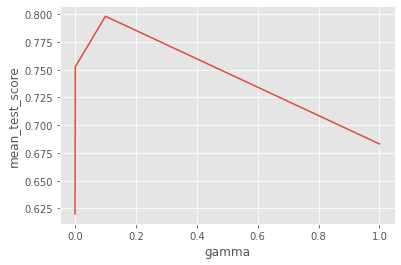

In [124]:
show_param_grid(gs_svc2, grid_svc2, 'gamma');

In [35]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(final_filter['–û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ–ª–Ω–æ–µ'], final_filter['theme0'].astype('int'), test_size = 0.3, random_state=241)

In [126]:
[final_filter['–û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ–ª–Ω–æ–µ']]

[0        –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ –Ω–µ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è –º–æ–π ...
 1        –î–æ–±—Ä—ã–π –¥–µ–Ω—å, –≤—ã —Å–Ω–æ–≤–∞ –ø–æ–≤—ã—Å–∏–ª–∏ –ª–∏–º–∏—Ç –¥–ª—è –ø–µ—Ä–µ—Ö...
 2        –û–±—Ä–∞—Ç–Ω–∞—è —Å–≤—è–∑—å –ø–æ –æ–±–Ω–æ–≤–ª–µ–Ω–Ω–æ–º –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—é ,–†–∞–Ω—å...
 3        –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, —Ö–æ—á—É –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞—Ç—å –µ—â—ë –æ–¥–Ω—É –∫–∞—Ä—Ç—É...
 4        –°–∫–æ–ª—å–∫–æ –∫–∞—Ä—Ç –º–æ–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å  –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ?,–ü—Ä–∏...
                                ...                        
 16796    –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, –∫–∞–∫ –º–æ–∂–Ω–æ –ø–æ–º–µ–Ω—è—Ç—å –Ω–æ–º–µ—Ä —Ç–µ–ª–µ—Ñ–æ–Ω...
 16797    –∞ –ø–æ–¥—Å–∫–∞–∂–∏—Ç–µ –∫–∞–∫ –ø—Ä–∏–≤—è–∑–∞—Ç—å –Ω–æ–≤—É—é –∫–∞—Ä—Ç—É –∫ —Ç–æ–º—É ...
 16798    –¥–æ–±—Ä—ã–π –¥–µ–Ω—å. –ø–æ –º–æ–µ–º—É –æ–±—Ä–∞—â–µ–Ω–∏—é –±—ã–ª–∞ —Å–æ–∑–¥–∞–Ω–∞ –∑...
 16799    –°–æ —Å–≤–æ–µ–≥–æ —Ç–µ–ª–µ—Ñ–æ–Ω–∞ –Ω–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å  –∞–∫—Ç–µ–≤–∏—Ä–æ–≤–∞—Ç—å...
 16800    –•–æ—Ç–µ–ª–∞ —É–∑–Ω–∞—Ç—å, –æ–±—Ä–∞—â–µ

In [100]:
X_train 

3935     –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –û–ø—Ç–∏–º–∏–∑–∏—Ä—É–π—Ç–µ –ø–æ–∂–∞–ª—É–π—Å—Ç–∞ –ø—Ä–∏–ª–æ–∂–µ...
9317     –ü–æ—á–µ–º—É –Ω–µ –≤–æ–π—Ç–∏ –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ?,7825682033874788...
11866    –∫–∞–∫ —É–¥–∞–ª–∏—Ç—å –¥—Ä—É–≥—É—é –∫–∞—Ä—Ç—É –∏–∑–ø—Ä–∏–ª–æ–∂–µ–Ω–∏—è,–∏ –¥–æ–±–∞–≤–∏...
2727     ?,–∞ –µ—Å–ª–∏ –∑–∞–ø–ª–∞—á—É –±–æ–ª—å—à–µ —á–µ–º –∑–∞–ø–∞–≤–ª—é—Å—å, –¥–µ–Ω—å–≥–∏ ...
3279     –î–æ–±—Ä—ã–π –¥–µ–Ω—å. –ü–æ–¥—Å–∫–∞–∂–∏—Ç–µ, –º–æ—è –∫–∞—Ä—Ç–∞ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä...
                               ...                        
8803     –ê–ó–° 20 –Ω–∞ —É–ª. –í–ª–∞–¥–∏–º–∏—Ä–æ–≤—Å–∫–∞—è –≤ –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫–µ —É–∂...
8829     –ö–∞–∫ –Ω–∞—á–∏—Å–ª—è–µ—Ç—Å—è –∫—ç—à–±—ç–∫ –ø–æ –∫–∞—Ä—Ç–µ –ü–æ—á—Ç–∞ –±–∞–Ω–∫–∞?,–£...
152      –¥–æ–±—Ä–æ–≥–æ –≤–µ—á–µ—Ä–∞, —É –º–µ–Ω—è —Å–º–µ–Ω–∏–ª—Å—è —Ç–µ–ª–µ—Ñ–æ–Ω, –∫ –∫–æ—Ç...
11184                 –ê –Ω–µ–ª—å–∑—è —Å–¥–µ–ª–∞—Ç—å –≤–∏—Ä—Ç—É–∞–ª—å–Ω—É—é –∫–∞—Ä—Ç—É? 
12940    –î–æ–±—Ä—ã–π –¥–µ–Ω—å. –Ø –∑–∞–ø—Ä–∞–≤–ª—è–ª–∞—Å—å 12.06.2019 30 –ª–∏—Ç—Ä...
Na

In [101]:
Y_train

<4201x24003 sparse matrix of type '<class 'numpy.float64'>'
	with 80446 stored elements in Compressed Sparse Row format>

In [91]:
count_vect11 = CountVectorizer()
X_train = count_vect11.fit_transform(X_train)

In [94]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test, pred)

NameError: name 'pred' is not defined

In [92]:
#4
clf_svc2 = SVC(kernel='linear', C = 1.0, random_state=241)
clf_svc2.fit(X_train, y_train)
X_test = count_vect11.transform(X_test)
pred1 = clf_svc2.predict(X_test)

In [95]:
accuracy_score(y_test, pred1)

0.8558978516416701

## –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –Ω—É–∂–Ω—ã—Ö (–ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Ç–µ–º)  –∏ –∑–∞–ø–∏—Å—å –≤ —Ñ–∞–π–ª

In [26]:
final = final.drop('theme3',1 )
final = final.drop('index', 1)

In [27]:
final['theme2'].unique()

array([    nan, 101108., 101103., 101102.,   1052., 101105., 105125.,
       101107., 101106., 101104.,   1053., 101101.])

In [28]:
final['theme1'].unique()

array([1053, 'None', 1011, 1012, 1051, 1052, 1054, 1013, 101, 1040, 109,
       1014, 1073], dtype=object)

–µ—Å—Ç—å –≥–ª—É–ø–æ—Å—Ç—å —Å —Ç–µ–º–∞–º–∏ 105 –∏ 101 - –æ–Ω–∏ –ø–æ–≤—Ç–æ—Ä—è—é—Ç—Å—è, –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —á–µ–≥–æ 101 –∑–∞–ø–∏—Å—ã–∞–≤–µ—Ç—Å—è –≤ theme1

In [29]:
final1 = final.loc[final['theme1'] != 109]
final1 = final.loc[final['theme1'] != 101]

In [30]:
#–≤—ã–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ 
final_filter = final1.loc[(final1['theme0'] == 101) | (final1['theme0'] == 102) |(final1['theme0'] == 105)]
final_filter = final_filter.loc[final_filter['theme1'] != 109]
final_filter = final_filter.loc[final_filter['theme1'] != 101]

In [31]:
final_filter.head()

–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è             –ê–≤—Ç–æ—Ä  \
0  00000000-0001-0000-0018-000109471528             Guest   
1  00000000-0001-0000-0018-000109474719             –ì–æ—Å—Ç—å   
2  00000000-0001-0000-0018-000109478254             –ì–æ—Å—Ç—å   
3  00000000-0001-0000-0018-000109479360  7825682054563260   
4  00000000-0001-0000-0018-000109485010             –ì–æ—Å—Ç—å   

                                 –û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ—Å–ª–µ–¥–Ω–µ–µ  –ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞  \
0  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ –Ω–µ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è –º–æ–π ...         0.650695   
1  –î–æ–±—Ä—ã–π –¥–µ–Ω—å, –≤—ã —Å–Ω–æ–≤–∞ –ø–æ–≤—ã—Å–∏–ª–∏ –ª–∏–º–∏—Ç –¥–ª—è –ø–µ—Ä–µ—Ö...         0.779866   
2  –†–∞–Ω—å—à–µ —Å—Ä–∞–∑—É –±—ã–ª–æ —É–∫–∞–∑–∞–Ω–æ —Å–∫–æ–ª—å–∫–æ –æ—Å—Ç–∞–ª–æ—Å—å –ª–∏—Ç...         0.959845   
3  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, —Ö–æ—á—É –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞—Ç—å –µ—â—ë –æ–¥–Ω—É –∫–∞—Ä—Ç—É...         0.660144   
4     –ù–µ –º–æ–≥—É –æ–±—ä–µ–¥–∏–Ω–∏—Ç—å –∫–∞—Ä—Ç—É –∏ –∞–Ω–Ω—É–ª–∏—Ä–æ–≤–∞—Ç—å —Å—Ç–∞—Ä—É—é         0.727443   

                                      –°–æ–æ–±—â–µ–Ω–∏–µ –ß–ê–í–û  \
0  –û–±–Ω–æ–≤–∏—Ç–µ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –¥–æ –ø–æ—Å–ª–µ–¥–Ω–µ–π ...   
1                                –ù–µ—Ç, —Ç–∞–∫–∏—Ö –ê–ó–° –Ω–µ—Ç.   
2  –ë–ª–∞–≥–æ–¥–∞—Ä–∏–º –í–∞—Å –∑–∞ –ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ–º —Å–µ—Ç–∏...   
3  –í —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å —É—Å–ª–æ–≤–∏—è–º–∏ –ü—Ä–æ–≥—Ä–∞–º–º—ã –ª–æ—è–ª—å–Ω–æ—Å—Ç...   
4  –í —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å —É—Å–ª–æ–≤–∏—è–º–∏ –ü—Ä–æ–≥—Ä–∞–º–º—ã –ª–æ—è–ª—å–Ω–æ—Å—Ç...   

                                           –°–æ–æ–±—â–µ–Ω–∏–µ theme0 theme1    theme2  \
0  –ü–æ–∂–∞–ª—É–π—Å—Ç–∞, –æ–±–Ω–æ–≤–∏—Ç–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –¥–æ –ø–æ—Å–ª–µ–¥–Ω–µ–π –≤...    105   1053       NaN   
1                                 –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –ù–µ—Ç.    102   None       NaN   
2  –ë–ª–∞–≥–æ–¥–∞—Ä–∏–º –í–∞—Å –∑–∞ –ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ–º —Å–µ—Ç–∏...    101   1011  101108.0   
3  –°–ø–∞—Å–∏–±–æ –∑–∞ –æ–∂–∏–¥–∞–Ω–∏–µ. –ù–µ—Ç.  –°–æ–≥–ª–∞—Å–Ω–æ –ø—Ä–∞–≤–∏–ª–∞–º –ø...    101   1012       NaN   
4  \n–°–æ–≥–ª–∞—Å–Ω–æ –ø—Ä–∞–≤–∏–ª–∞–º –ø—Ä–æ–≥—Ä–∞–º–º—ã –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏, –∫ –æ–¥...    101   1012       NaN   

                                    –û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ–ª–Ω–æ–µ  
0  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–∏ –Ω–µ —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è –º–æ–π ...  
1  –î–æ–±—Ä—ã–π –¥–µ–Ω—å, –≤—ã —Å–Ω–æ–≤–∞ –ø–æ–≤—ã—Å–∏–ª–∏ –ª–∏–º–∏—Ç –¥–ª—è –ø–µ—Ä–µ—Ö...  
2  –û–±—Ä–∞—Ç–Ω–∞—è —Å–≤—è–∑—å –ø–æ –æ–±–Ω–æ–≤–ª–µ–Ω–Ω–æ–º –ø—Ä–∏–ª–æ–∂–µ–Ω–∏—é ,–†–∞–Ω—å...  
3  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, —Ö–æ—á—É –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞—Ç—å –µ—â—ë –æ–¥–Ω—É –∫–∞—Ä—Ç—É...  
4  –°–∫–æ–ª—å–∫–æ –∫–∞—Ä—Ç –º–æ–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å  –≤ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ?,–ü—Ä–∏...

In [32]:
final_filter = final_filter[['–ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞','–°–æ–æ–±—â–µ–Ω–∏–µ –ß–ê–í–û', '–°–æ–æ–±—â–µ–Ω–∏–µ', 'theme0', 'theme1', 'theme2','–û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ–ª–Ω–æ–µ', '–û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ—Å–ª–µ–¥–Ω–µ–µ']]

In [33]:
dict_to_json = {}
dict_to_json_filter = {}

In [34]:
for t1 in final1['theme0'].unique():
    for t2 in final1['theme1'].unique():
        try:
            #print(final.loc[final['theme1'] == t2])
            try:
                for t3 in final1['theme2'].unique():
                    dict_tmp = {}
                    dict_tmp[t3] = final1.loc[final1['theme2'] == t3]
                    dict_to_json[t1][t2] = dict_tmp
                    s=0
            except:
                dict_tmp = {}
                dict_tmp[t2] = final1.loc[final1['theme1'] == t2]
                dict_to_json[t1] = dict_tmp
        except:
            dict_to_json[t1] = final1.loc[final1['theme0'] == t1]

In [35]:
for t1 in final_filter['theme0'].unique():
    for t2 in final_filter['theme1'].unique():
        try:
            #print(final_filter.loc[final_filter['theme1'] == t2])
            try:
                for t3 in final_filter['theme2'].unique():
                    dict_tmp = {}
                    dict_tmp[str(t3)] =  final_filter.loc[final_filter['theme2']==t3].to_json(orient='records')
                    #dict_tmp = {dict_tmp[str(t3)]:[{'–°–æ–æ–±—â–µ–Ω–∏–µ':final_filter.loc[final_filter['theme2'] == t3]['–°–æ–æ–±—â–µ–Ω–∏–µ']}]}
                    print(dict_tmp)
                    #dict_tmp[str(t3)] = final_filter.loc[final_filter['theme2'] == t3]
                    dict_to_json_filter[str(t1)][str(t2)] = dict_tmp
                    s=0
            except:
                dict_tmp = {}
                dict_tmp[str(t2)] =  final_filter.loc[final_filter['theme1']==t2].to_json(orient='records')
                    
                #dict_tmp[str(t2)] = final_filter.loc[final_filter['theme1'] == t2]
                dict_to_json_filter[str(t1)] = dict_tmp
        except:            
            dict_to_json_filter[str(t1)] = final_filter.loc[final_filter['theme0'] == t1].to_json(orient='records')        
            #dict_to_json_filter[str(t1)] = final_filter.loc[final_filter['theme0'] == t1]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [36]:
dict_to_json

{105: {1053:                     –ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è             –ê–≤—Ç–æ—Ä  \
  0      00000000-0001-0000-0018-000109471528             Guest   
  9919   00000000-0001-0000-0018-000112201926  7825682056571915   
  9924   00000000-0001-0000-0018-000112203235             Guest   
  10050  00000000-0001-0000-0018-000112237543             Guest   
  10120  00000000-0001-0000-0018-000112254355             Guest   
  ...                                     ...               ...   
  16599  935aba33-175d-44eb-9cea-454a50ac335b            –ù–∞—Ç–∞–ª–∏   
  16618  9c906409-172f-4fc4-893d-8772d27650ef          –ê–Ω–∞—Ç–æ–ª–∏–π   
  16631  a0aeef6a-3b55-4b88-a127-c9dd8e870304              –ò–ª—å—è   
  16666  b391ccf6-5ab0-47a0-ba18-2a49561b4644           –í–∞–ª–µ—Ä–∏–π   
  16798  fe66972b-8b82-41d5-a680-369a248509ea           Aleksey   
  
                                       –û–±—Ä–∞—â–µ–Ω–∏–µ –ø–æ—Å–ª–µ–¥–Ω–µ–µ  –ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞  \
  0      –∑–¥—Ä–∞–≤

In [39]:
with open("json_for_classif", "w", encoding="utf-8", ) as file:
    json.dump(dict_to_json_filter, file, indent = 4)

In [ ]:
response = "–°–ø–∏—Å–æ–∫ –∞–∫—Ç—É–∞–ª—å–Ω—ã—Ö –∞–∫—Ü–∏–π –í—ã –º–æ–∂–µ—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –Ω–∞–∂–∞–≤ –∑–Ω–∞—á–æ–∫ ¬´–ê–∫—Ü–∏–∏¬ª –≤–Ω–∏–∑—É —ç–∫—Ä–∞–Ω–∞."
ReturnLabel(df_chavo, theme_label, response)

In [ ]:
d = pd.DataFrame(CousinDist(df_chavo, data_csv))

In [ ]:
d = d.loc[d['–ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞'] > 0.65]

In [37]:
#–¥–æ–±–∞–≤–ª—è–µ–º –º–µ—Ç–∫–∏ —Å–æ–≥–ª–∞—Å–Ω–æ –æ—Ç–≤–µ—Ç—É –∏–∑ –ß–ê–í–û (–º–µ—Ç–∫–∏ –±—É–¥—É—Ç —É —Å–æ–æ–±—â–µ–Ω–∏–π –∏–∑ –ø–µ—Ä–µ–ø–∏—Å–∫–∏)
for i in range(0,2):
    d['theme'+ str(i)]='None'
    
for index, row in d.iterrows():
    #print(index)
    response = row['–°–æ–æ–±—â–µ–Ω–∏–µ –ß–ê–í–û']    
    #print(response)    
    res_lab = pd.DataFrame(ReturnLabel(df_chavo, theme_label, str(response)))
    for i in range(0,res_lab.shape[0]):
        #print(i, res_lab.iloc[i]['label'])
        d.at[index, 'theme'+ str(i)] = res_lab.iloc[i]['label']
        #print(row['theme'+ str(i)])

In [ ]:
d_chavo_shot.to_csv('result_with_labels', sep=';')

In [39]:
d = pd.DataFrame(d, columns = ['–ö–æ—Å–∏–Ω—É—Å–Ω–∞—è –º–µ—Ä–∞','–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è','–°–æ–æ–±—â–µ–Ω–∏–µ –ß–ê–í–û', '–°–æ–æ–±—â–µ–Ω–∏–µ','theme0', 'theme1', 'theme2'])

In [502]:
d.to_csv('result_with_labels_full', sep=';')

In [41]:
d_chavo_labels  = pd.DataFrame(d[['theme0', 'theme1', 'theme2']], columns = ['theme0', 'theme1', 'theme2'])

In [485]:
d_chavo_labels.groupby(['theme0']).agg('count').to_csv('group_by_1_full.csv', sep=';')

In [486]:
d_chavo_labels.groupby(['theme0', 'theme1']).agg('count').to_csv('group_by_1_2_full.csv', sep=';')

In [423]:
d_chavo_labels.groupby(['theme0']).agg('count')

theme1  theme2
theme0                                       
None                                4       4
SPACE.GO                            9       9
STOPEXPRESS                         3       3
–ê–î–†–ï–°–ê –ê–ó–°                        198     198
–î–†–£–ì–ò–ï –ü–ê–†–¢–ù–ï–†–´                     9       9
–ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï              740     740
–ü–†–ò–õ–û–ñ–ï–ù–ò–ï –ê–ó–° GO                2436    2436
–°–ï–¢–¨ –ü–ê–†–¢–ï–ù–†–°–ö–ò–• –ê–ó–° ¬´–û–ü–¢–ò¬ª         3       3
–°–û–î–ï–†–ñ–ê–ù–ò–ï –ß–ï–ö–ê/–î–£–ë–õ–ò–ö–ê–¢ –ß–ï–ö–ê       4       4
–°–ü–û–°–û–ë–´ –û–ü–õ–ê–¢–´                      7       7

In [424]:
d_chavo_labels.groupby(['theme0', 'theme1']).agg('count')

theme2
theme0                        theme1                      
None                          None                       4
SPACE.GO                      None                       9
STOPEXPRESS                   None                       3
–ê–î–†–ï–°–ê –ê–ó–°                    None                     198
–î–†–£–ì–ò–ï –ü–ê–†–¢–ù–ï–†–´               None                       9
–ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï          –ö–ê–†–¢–ê –ü–õ –í –ú–ü            340
                              –û–ü–õ–ê–¢–ê –ß–ï–†–ï–ó –ú–ü          263
                              –§–£–ù–ö–¶–ò–û–ù–ê–õ –ú–ü            137
–ü–†–ò–õ–û–ñ–ï–ù–ò–ï –ê–ó–° GO             –ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï    1512
                              –û–ü–õ–ê–¢–ê –ß–ï–†–ï–ó –ê–ó–°.GO      259
                              –§–£–ù–ö–¶–ò–û–ù–ê–õ –ê–ó–°.GO        665
–°–ï–¢–¨ –ü–ê–†–¢–ï–ù–†–°–ö–ò–• –ê–ó–° ¬´–û–ü–¢–ò¬ª   None                       3
–°–û–î–ï–†–ñ–ê–ù–ò–ï –ß–ï–ö–ê/–î–£–ë–õ–ò–ö–ê–¢ –ß–ï–ö–ê None                       1
                              –ö–û–ü–ò–Ø –ß–ï–ö–ê                 3
–°–ü–û–°–û–ë–´ –û–ü–õ–ê–¢–´                None                       7

In [481]:
d_chavo_labels.groupby(['theme0']).agg('count')

theme1  theme2
theme0                                       
SPACE.GO                          111     111
STOPEXPRESS                        29      29
–ê–î–†–ï–°–ê –ê–ó–°                        657     657
–î–†–£–ì–ò–ï –ü–ê–†–¢–ù–ï–†–´                    14      14
–ö–û–ù–¢–ê–ö–¢–´ –ï–¶–ü–ö                       9       9
–ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï             9495    9495
–ü–†–ò–õ–û–ñ–ï–ù–ò–ï –ê–ó–° GO               13361   13361
–†–ê–ó–í–ò–¢–ò–ï –°–ï–¢–ò                       9       9
–°–ï–¢–¨ –ü–ê–†–¢–ï–ù–†–°–ö–ò–• –ê–ó–° ¬´–û–ü–¢–ò¬ª        37      37
–°–û–î–ï–†–ñ–ê–ù–ò–ï –ß–ï–ö–ê/–î–£–ë–õ–ò–ö–ê–¢ –ß–ï–ö–ê     190     190
–°–ü–û–°–û–ë–´ –û–ü–õ–ê–¢–´                     56      56

In [482]:
d_chavo_labels.groupby(['theme0', 'theme1']).agg('count')

theme2
theme0                        theme1                               
SPACE.GO                      None                              109
                              –ó–ê–ü–†–ê–í–ò–õ–°–Ø –ù–ï –¢–ï–ú                   2
STOPEXPRESS                   None                               29
–ê–î–†–ï–°–ê –ê–ó–°                    None                              657
–î–†–£–ì–ò–ï –ü–ê–†–¢–ù–ï–†–´               None                               12
                              –î–†–£–ì–ò–ï –ü–ê–†–¢–ù–ï–†–´                     2
–ö–û–ù–¢–ê–ö–¢–´ –ï–¶–ü–ö                 None                                9
–ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï          –ö–ê–†–¢–ê –ü–õ –í –ú–ü                    6197
                              –û–ü–õ–ê–¢–ê –ß–ï–†–ï–ó –ú–ü                  1592
                              –°–ï–†–í–ò–°–´ –ü–ê–†–¢–ù–ï–†–û–í –ú–ü               14
                              –§–£–ù–ö–¶–ò–û–ù–ê–õ –ú–ü                    1692
–ü–†–ò–õ–û–ñ–ï–ù–ò–ï –ê–ó–° GO             –ö–ê–†–¢–ê –ü–õ –í –ê–ó–°.GO                 409
                              –ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï             1683
                              –û–ü–õ–ê–¢–ê –ß–ï–†–ï–ó –ê–ó–°.GO              1918
                              –°–û–í–ú–ï–°–¢–ù–ê–Ø –ê–ö–¶–ò–Ø –ú–ò–† - –ê–ó–°.GO    5613
                              –§–£–ù–ö–¶–ò–û–ù–ê–õ –ê–ó–°.GO                3738
–†–ê–ó–í–ò–¢–ò–ï –°–ï–¢–ò                 None                                9
–°–ï–¢–¨ –ü–ê–†–¢–ï–ù–†–°–ö–ò–• –ê–ó–° ¬´–û–ü–¢–ò¬ª   None                               37
–°–û–î–ï–†–ñ–ê–ù–ò–ï –ß–ï–ö–ê/–î–£–ë–õ–ò–ö–ê–¢ –ß–ï–ö–ê None                               36
                              –ö–û–ü–ò–Ø –ß–ï–ö–ê                        154
–°–ü–û–°–û–ë–´ –û–ü–õ–ê–¢–´                None                               52
                              –ö–ê–†–¢–ê –ü–õ –í –ê–ó–°.GO                   1
                              –°–û–í–ú–ï–°–¢–ù–ê–Ø –ê–ö–¶–ò–Ø –ú–ò–† - –ê–ó–°.GO       1
                              –§–£–ù–ö–¶–ò–û–ù–ê–õ –ê–ó–°.GO                   2

In [487]:
d_chavo_labels.groupby(['theme0', 'theme1', 'theme2']).agg('count')

Empty DataFrame
Columns: []
Index: [(SPACE.GO, None, None), (SPACE.GO, –ó–ê–ü–†–ê–í–ò–õ–°–Ø –ù–ï –¢–ï–ú, None), (STOPEXPRESS, None, None), (–ê–î–†–ï–°–ê –ê–ó–°, None, None), (–î–†–£–ì–ò–ï –ü–ê–†–¢–ù–ï–†–´, None, None), (–î–†–£–ì–ò–ï –ü–ê–†–¢–ù–ï–†–´, –î–†–£–ì–ò–ï –ü–ê–†–¢–ù–ï–†–´, None), (–ö–û–ù–¢–ê–ö–¢–´ –ï–¶–ü–ö, None, None), (–ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï, –ö–ê–†–¢–ê –ü–õ –í –ú–ü, None), (–ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï, –û–ü–õ–ê–¢–ê –ß–ï–†–ï–ó –ú–ü, None), (–ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï, –°–ï–†–í–ò–°–´ –ü–ê–†–¢–ù–ï–†–û–í –ú–ü, None), (–ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï, –§–£–ù–ö–¶–ò–û–ù–ê–õ –ú–ü, –ê–ö–¶–ò–ò), (–ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï, –§–£–ù–ö–¶–ò–û–ù–ê–õ –ú–ü, –í–•–û–î (–ê–¢–í–û–†–ò–ó–ê–¶–ò–Ø)), (–ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï, –§–£–ù–ö–¶–ò–û–ù–ê–õ –ú–ü, –õ–ò–¢–†–´), (–ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï, –§–£–ù–ö–¶–ò–û–ù–ê–õ –ú–ü, –û–¶–ï–ù–ö–ê –ê–ó–°), (–ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï, –§–£–ù–ö–¶–ò–û–ù–ê–õ –ú–ü, –†–ê–ë–û–¢–ê –ú–û–ë–ò–õ–¨–ù–û–ì–û –ü–†–ò–õ–û–ñ–ï–ù–ò–Ø), (–ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï, –§–£–ù–ö–¶–ò–û–ù–ê–õ –ú–ü, –¢–ê–†–ò–§–´), (–ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï, –§–£–ù–ö–¶–ò–û–ù–ê–õ –ú–ü, –§–£–ù–ö–¶–ò–ò), (–ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï, –§–£–ù–ö–¶–ò–û–ù–ê–õ –ú–ü, –¶–ï–ù–ê), (–ü–†–ò–õ–û–ñ–ï–ù–ò–ï –ê–ó–° GO, –ö–ê–†–¢–ê –ü–õ –í –ê–ó–°.GO, None), (–ü–†–ò–õ–û–ñ–ï–ù–ò–ï –ê–ó–° GO, –ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï, –ö–ê–†–¢–ê –ü–õ –í –ê–ó–°.GO), (–ü–†–ò–õ–û–ñ–ï–ù–ò–ï –ê–ó–° GO, –ú–û–ë–ò–õ–¨–ù–û–ï –ü–†–ò–õ–û–ñ–ï–ù–ò–ï, –û–ü–õ–ê–¢–ê –ß–ï–†–ï–ó –ê–ó–°.GO), (–ü–†–ò–õ–û–ñ–ï–ù–ò–ï –ê–ó–° GO, –û–ü–õ–ê–¢–ê –ß–ï–†–ï–ó –ê–ó–°.GO, None), (–ü–†–ò–õ–û–ñ–ï–ù–ò–ï –ê–ó–° GO, –°–û–í–ú–ï–°–¢–ù–ê–Ø –ê–ö–¶–ò–Ø –ú–ò–† - –ê–ó–°.GO, None), (–ü–†–ò–õ–û–ñ–ï–ù–ò–ï –ê–ó–° GO, –§–£–ù–ö–¶–ò–û–ù–ê–õ –ê–ó–°.GO, CarTaxi), (–ü–†–ò–õ–û–ñ–ï–ù–ò–ï –ê–ó–° GO, –§–£–ù–ö–¶–ò–û–ù–ê–õ –ê–ó–°.GO, None), (–†–ê–ó–í–ò–¢–ò–ï –°–ï–¢–ò, None, None), (–°–ï–¢–¨ –ü–ê–†–¢–ï–ù–†–°–ö–ò–• –ê–ó–° ¬´–û–ü–¢–ò¬ª, None, None), (–°–û–î–ï–†–ñ–ê–ù–ò–ï –ß–ï–ö–ê/–î–£–ë–õ–ò–ö–ê–¢ –ß–ï–ö–ê, None, None), (–°–û–î–ï–†–ñ–ê–ù–ò–ï –ß–ï–ö–ê/–î–£–ë–õ–ò–ö–ê–¢ –ß–ï–ö–ê, –ö–û–ü–ò–Ø –ß–ï–ö–ê, None), (–°–ü–û–°–û–ë–´ –û–ü–õ–ê–¢–´, None, None), (–°–ü–û–°–û–ë–´ –û–ü–õ–ê–¢–´, –ö–ê–†–¢–ê –ü–õ –í –ê–ó–°.GO, None), (–°–ü–û–°–û–ë–´ –û–ü–õ–ê–¢–´, –°–û–í–ú–ï–°–¢–ù–ê–Ø –ê–ö–¶–ò–Ø –ú–ò–† - –ê–ó–°.GO, None), (–°–ü–û–°–û–ë–´ –û–ü–õ–ê–¢–´, –§–£–ù–ö–¶–ò–û–ù–ê–õ –ê–ó–°.GO, None)]

In [497]:
theme_label.drop_duplicates(subset='theme', keep="last").sort_values(by='theme').reset_index().to_csv('labels.csv', sep=';')

In [499]:
theme_label = theme_label.drop_duplicates(subset='theme', keep="last").sort_values(by='theme').reset_index()

In [501]:
theme_label[['label', 'theme']].to_csv('labels.csv', sep=';')

In [89]:
data_csv_test = pd.DataFrame(data_csv_test.dropna().groupby('–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è')['–°–æ–æ–±—â–µ–Ω–∏—è'].apply(list),columns=['–ò–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–±—Ä–∞—â–µ–Ω–∏—è', '–°–æ–æ–±—â–µ–Ω–∏—è'])